In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

In [4]:
X_train = x_train.astype('float32') / 255
X_test = x_test.astype('float32') / 255

In [5]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [6]:
noise_factor = 0.5

X_train_noise = X_train + noise_factor*np.random.normal(0.0, 1.0, X_train.shape)
X_test_noise = X_test + noise_factor*np.random.normal(0.0, 1.0, X_test.shape)

In [7]:
X_train_noise = np.clip(X_train_noise, 0.0, 1.0)
X_test_noise = np.clip(X_test_noise, 0.0, 1.0)

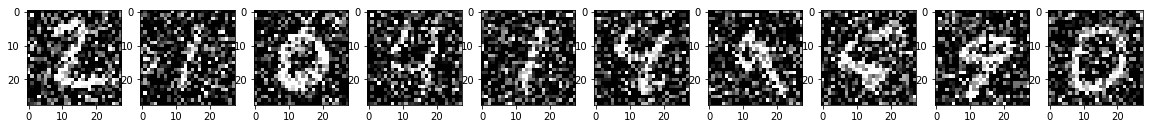

In [8]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    sp = plt.subplot(1, n, i)
    plt.imshow(X_test_noise[i].reshape(28, 28))
    plt.gray()
plt.show()

In [9]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

In [10]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3,3), activation="relu", padding="same")(input_img)
# (28, 28, 32)

x = MaxPool2D((2,2))(x)
# (14, 14, 32)

x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
# (14, 14, 32)

encoder = MaxPool2D((2,2))(x)
# (7, 7, 32)

x = Conv2D(32, (3,3), activation="relu", padding="same")(encoder)
# (7, 7, 32)
x = UpSampling2D((2, 2))(x)
# (14, 14, 32)
x = Conv2D(32, (3,3), activation="relu", padding="same")(x)
# (14, 14, 32)
x = UpSampling2D((2, 2))(x)
# (28, 28, 32)
decoder = Conv2D(1, (3,3), activation="sigmoid", padding="same")(x)

autoencoder = Model(input_img, decoder)
autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")

In [11]:
autoencoder.fit(X_train_noise, X_train,
               validation_data=(X_test_noise, X_test),
               epochs=1,
               batch_size=128,
               shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 189s 3ms/step - loss: 0.1784 - val_loss: 0.1225


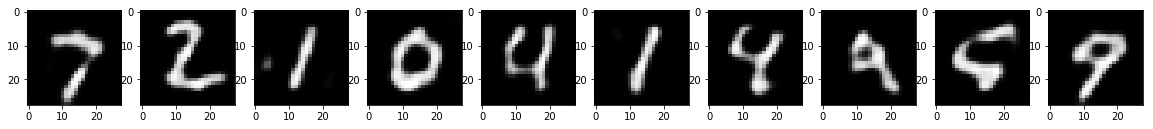

In [13]:
denoised_images = autoencoder.predict(X_test_noise[:10])

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    sp = plt.subplot(1, n, i)
    plt.imshow(denoised_images[i-1].reshape(28, 28))
    plt.gray()
plt.show()

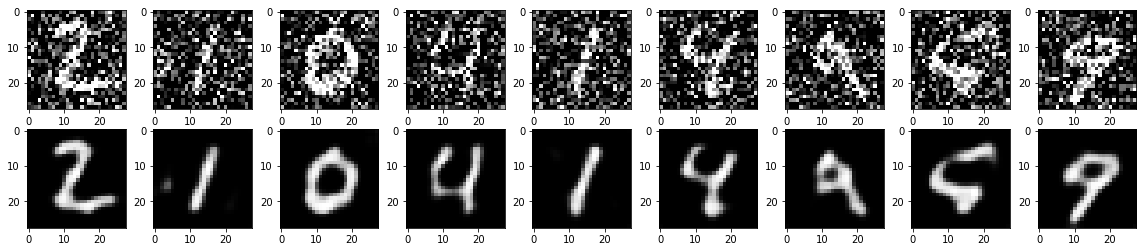

In [15]:
n = 9
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    
    plt.subplot(2, n, i)
    plt.imshow(X_test_noise[i].reshape(28, 28))
    plt.gray()
    
    plt.subplot(2, n, n+i)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    
plt.show()